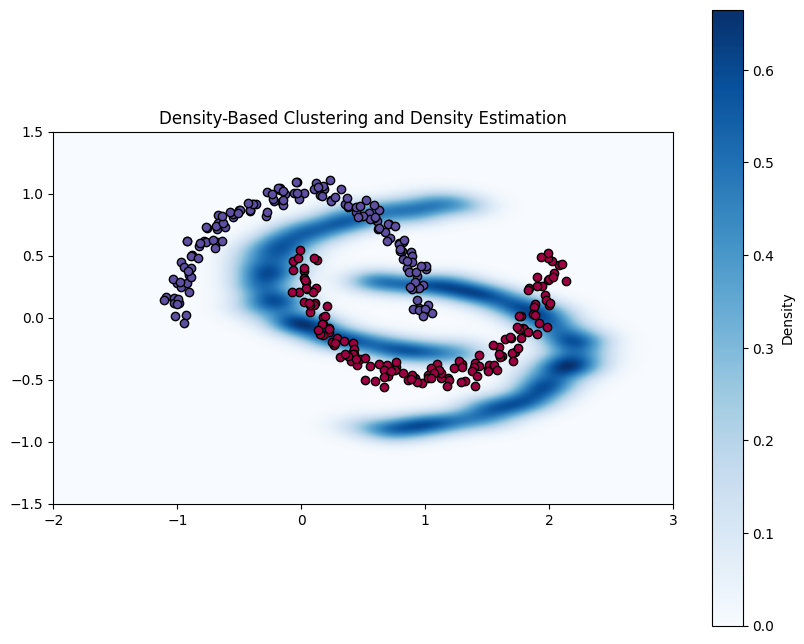

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity

# 设置随机种子以确保结果可复现
np.random.seed(42)

# 生成数据集
X, _ = make_moons(n_samples=300, noise=0.05)

# DBSCAN聚类
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# KDE密度估计
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)
log_dens = kde.score_samples(X)

# 创建网格用于绘制热力图
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 1.5, 500))
Z = np.vstack([xx.ravel(), yy.ravel()]).T
Z = np.exp(kde.score_samples(Z)).reshape(xx.shape)

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(np.rot90(Z), cmap=plt.cm.Blues, extent=[-2, 3, -1.5, 1.5])
plt.colorbar(label='Density')

# 绘制数据点
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 黑色用于噪声点
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Density-Based Clustering and Density Estimation')
plt.xlim(-2, 3)
plt.ylim(-1.5, 1.5)
plt.show()

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def draw_dbscan_heatmap(tlwhs, img):
    # 创建一个空列表来存储每个聚类的中心点
    centers = []
    
    # 遍历每个tlwh列表
    for tlwh in tlwhs:
        x1, y1, w, h = tlwh
        center_x = x1 + w / 2
        center_y = y1 + h / 2
        centers.append([center_x, center_y])

    # 归一化中心点
    min_values = np.min(centers, axis=0)
    max_values = np.max(centers, axis=0)
    normalized_centers = (centers - min_values) / (max_values - min_values)

    # DBSCAN聚类
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    labels = dbscan.fit_predict(normalized_centers)

    # 计算热力图
    xy = np.vstack(centers)
    density = gaussian_kde(xy.T)
    density.covariance_factor = lambda : .25
    density._compute_covariance()

    # 创建热力图
    heatmap, xedges, yedges = np.histogram2d(normalized_centers[:, 0], normalized_centers[:, 1],
                                             bins=40, range=[[0,1],[0,1]], weights=density(xy.T))

    # 生成颜色映射
    cmap = LinearSegmentedColormap.from_list('custom', ['blue', 'red'], N=256)

    # 调整图像大小以匹配热力图
    img_resized = cv2.resize(img, (heatmap.shape[1], heatmap.shape[0]), interpolation=cv2.INTER_LINEAR)

    # 将图像从BGR转换到RGB以便在matplotlib中正确显示
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # 使用matplotlib展示图像和热力图
    fig, ax = plt.subplots()
    ax.imshow(img_rgb, origin='upper')
    ax.imshow(heatmap.T, origin='lower', cmap=cmap, extent=[0,1,0,1], alpha=0.5)

    plt.show()

# 示例代码
if __name__ == "__main__":
    # 加载图像
    img = cv2.imread('./002.jpg')

    # 假设的tlwhs数据，通常从跟踪算法获取
    tlwhs = [[100, 100, 50, 50], [150, 150, 50, 50], [200, 200, 50, 50]]

    # 调用函数
    draw_dbscan_heatmap(tlwhs, img)

In [12]:
import cv2 as cv
import numpy as np 

# 创建一个黑色的图像，一个numpy数组
image = np.zeros((512, 512, 3), np.uint8)

# 在图像上画一条红色的线
cv.line(image, pt1 = (10, 10), pt2 =(10, 20), color = (0, 0, 255), thickness=5 ,lineType=cv.LINE_AA, shift=None)


# 显示图像
cv.imwrite('s.jpg', image)


True

In [4]:
import onnxruntime as ort

# 创建一个会话选项
session_options =
# 检查 CUDAExecutionProvider 是否在提供者列表中
providers = ['CPUExecutionProvider', 'CUDAExecutionProvider']
for provider in providers:
    print(f"Checking for {provider}...")
    try:
        session_options.add_session_config_entry(provider, '1')
        print(f"{provider} is available.")
    except ValueError:
        print(f"{provider} is not available.")



AttributeError: module 'onnxruntime' has no attribute 'SessionOptions'